In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('SeoulBikeData.csv',encoding='ISO-8859-1')

In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
print('The DataFrame contains 8760 lines and 14 columns because in a day we have 24 hours and we have 365 days a year so 365*24 = 8760, which represents the number of lines')


The DataFrame contains 8760 lines and 14 columns because in a day we have 24 hours and we have 365 days a year so 365*24 = 8760, which represents the number of lines


In [5]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [7]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [8]:
df['Date']=pd.to_datetime(df['Date'],format="%d/%m/%Y")

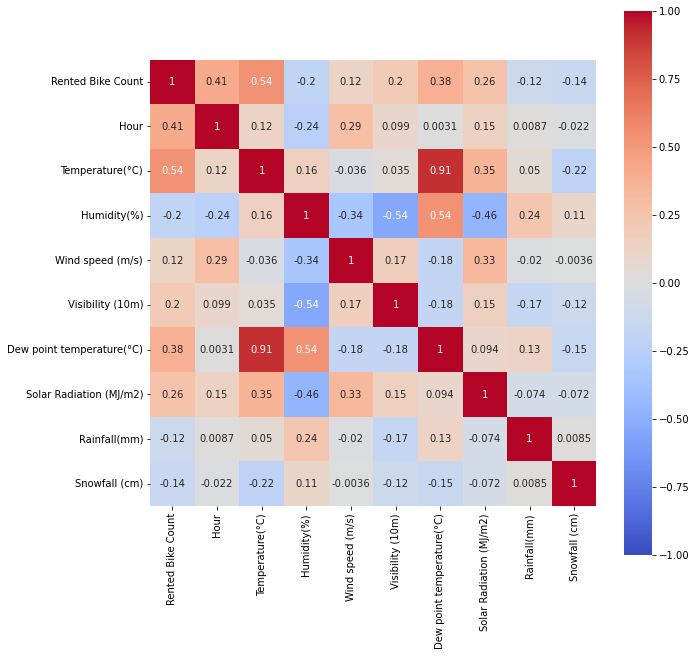

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);

In [10]:
df=df.drop(['Dew point temperature(°C)'],axis=1)

In [11]:
df1Corr=pd.DataFrame(df.corr().unstack().sort_values(ascending=False)['Rented Bike Count'],columns=['Correlation to the target'])
df1Corr.style.background_gradient(cmap= sns.light_palette("red", as_cmap=True))

,Correlation to the target
Rented Bike Count,1.000000
Temperature(°C),0.538558
Hour,0.410257
Solar Radiation (MJ/m2),0.261837
Visibility (10m),0.199280
Wind speed (m/s),0.121108
Rainfall(mm),-0.123074
Snowfall (cm),-0.141804
Humidity(%),-0.199780


In [12]:
df['label_day_night']=df['Hour'].apply(lambda x : 'Night' if (x >20 or x<5) else( 'Day'))

In [13]:
df['WeekDay']=df["Date"].dt.day_name() 

In [14]:
df['Month']=df['Date'].dt.month

<AxesSubplot:xlabel='Date'>

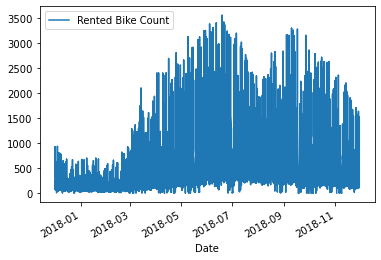

In [15]:
df.plot(x='Date',y='Rented Bike Count',kind='line')

In [16]:
df1VizSeasons=pd.DataFrame(df.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending=False))
df1VizSeasons.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Rented Bike Count
Seasons,
Summer,2283234
Autumn,1790002
Spring,1611909
Winter,487169


In [17]:
df1VizSolarRadiation=pd.DataFrame(df.groupby('Seasons').sum()['Solar Radiation (MJ/m2)'].sort_values(ascending=False))
df1VizSolarRadiation.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Solar Radiation (MJ/m2)
Seasons,
Summer,1680.850000
Spring,1520.840000
Autumn,1139.650000
Winter,644.070000


<AxesSubplot:ylabel='Rented Bike Count'>

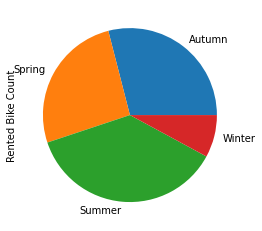

In [18]:
df.groupby('Seasons').sum()['Rented Bike Count'].plot.pie()

<AxesSubplot:xlabel='Solar Radiation (MJ/m2)'>

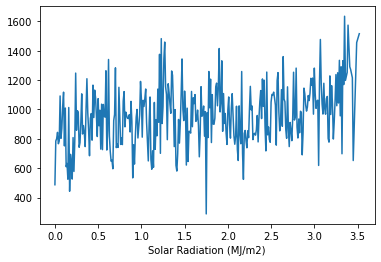

In [19]:
df.groupby('Solar Radiation (MJ/m2)').mean()['Rented Bike Count'].plot()

<AxesSubplot:xlabel='Hour'>

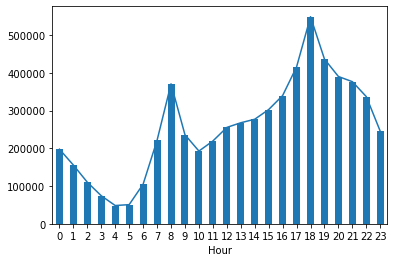

In [20]:
df.groupby('Hour').sum()['Rented Bike Count'].plot.bar()
df.groupby('Hour').sum()['Rented Bike Count'].plot()

In [21]:
df1VizDays=pd.DataFrame(df.groupby('WeekDay').sum()['Rented Bike Count'].sort_values(ascending=False))
df1VizDays.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Rented Bike Count
WeekDay,
Friday,950334
Wednesday,923956
Monday,911743
Saturday,885492
Thursday,861999
Tuesday,858596
Sunday,780194


<AxesSubplot:xlabel='Temperature(°C)'>

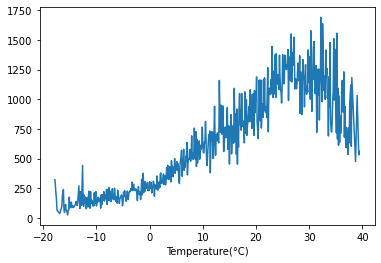

In [22]:
df.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot()

<AxesSubplot:ylabel='Rented Bike Count'>

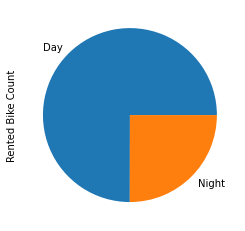

In [23]:
df.groupby('label_day_night').sum()['Rented Bike Count'].plot.pie()

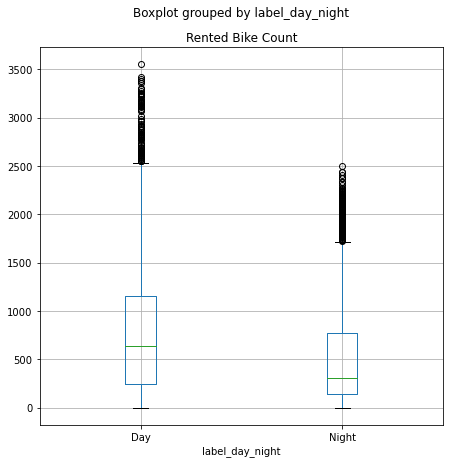

In [24]:
boxplotDay_night= df.boxplot(['Rented Bike Count'],by='label_day_night',figsize=(7,7))

<AxesSubplot:ylabel='Rented Bike Count'>

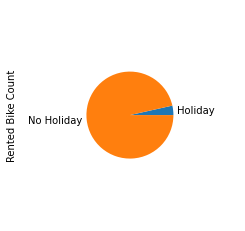

In [25]:
df.groupby('Holiday').sum()['Rented Bike Count'].plot.pie(radius=0.5)

In [26]:
dfHoliday=df.loc[df['Holiday'] == 'Holiday']

In [27]:
dfHoliday.shape

(432, 16)

<AxesSubplot:xlabel='Rainfall(mm)'>

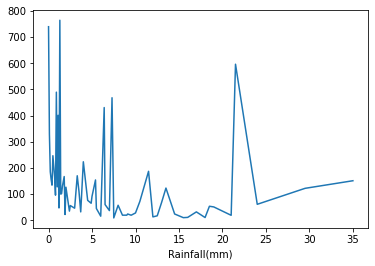

In [28]:
df.groupby('Rainfall(mm)').mean()['Rented Bike Count'].plot()

In [29]:
df.loc[(df['Rainfall(mm)']>20)&(df['Rainfall(mm)']<25)]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,label_day_night,WeekDay,Month
5034,2018-06-28,596,18,20.6,97,0.7,222,0.14,21.5,0.0,Summer,No Holiday,Yes,Day,Thursday,6
5132,2018-07-02,61,20,23.5,97,0.1,1814,0.04,24.0,0.0,Summer,No Holiday,Yes,Day,Monday,7
6524,2018-08-29,19,20,23.4,98,0.6,70,0.00,21.0,0.0,Summer,No Holiday,Yes,Day,Wednesday,8


<AxesSubplot:xlabel='Snowfall (cm)'>

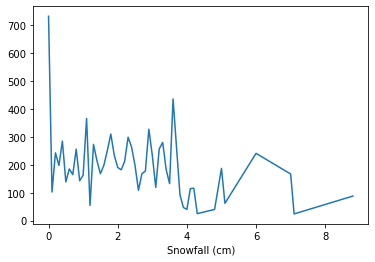

In [30]:
df.groupby('Snowfall (cm)').mean()['Rented Bike Count'].plot()

In [31]:
mapping_dictDay={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

df['WeekDayEncoding']=df['WeekDay'].map(mapping_dictDay)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [33]:
reporting={}

In [34]:
X_MultipleLinearRegression=df.drop(['Rented Bike Count','Date','Seasons','Holiday','label_day_night','Functioning Day','WeekDay'],axis =1)
y=df.iloc[:,1] #the target

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X_MultipleLinearRegression,y,test_size=0.27)

In [36]:
regr = linear_model.LinearRegression()
fitregr=regr.fit(X_train, y_train)
predregrtrain=fitregr.predict(X_train)
predregrtest=fitregr.predict(X_test)

In [37]:
print('The equation of this Linear Regression has format : y= coefficient*Features + intercept')
print('Linear model intercept: {} and the coefficients are: {}'
     .format(fitregr.intercept_,fitregr.coef_))

The equation of this Linear Regression has format : y= coefficient*Features + intercept
Linear model intercept: 427.45828199060327 and the coefficients are: [ 2.68881170e+01  3.09975271e+01 -7.42646861e+00  1.02297597e+01
  1.23608752e-02 -7.80994175e+01 -5.67710045e+01  1.00511482e+01
  8.10123423e+00 -9.44916406e+00]


In [38]:
train_set_rmse = (np.sqrt(mean_squared_error(predregrtrain,y_train )))
train_set_r2 = r2_score(y_train, predregrtrain)
print('Linear model, R2 train score is : {} and the train root mean square is: {}'
     .format(train_set_r2,train_set_rmse))

test_set_rmse = (np.sqrt(mean_squared_error(predregrtest,y_test )))
test_set_r2 = r2_score(y_test, predregrtest)
print('Linear model, R2 test score is : {} and the test root mean square is: {}'
     .format(test_set_r2,test_set_rmse))

Linear model, R2 train score is : 0.46669682763050335 and the train root mean square is: 470.57886573617645
Linear model, R2 test score is : 0.4888499809516408 and the test root mean square is: 462.1153602072632


In [39]:
reporting['Linear regression']=test_set_r2

In [40]:
#fitregr.predict([[10,10,60,3,1000,0,0,2,12,1]])

In [41]:
X_RidgeRegression=df.drop(['Rented Bike Count','Date','Seasons','Holiday','label_day_night','Functioning Day','WeekDay'],axis =1)
y=df.iloc[:,1] #the target
X_train,X_test,y_train,y_test=train_test_split(X_RidgeRegression,y,test_size=0.27)

In [42]:
errors=[]
coefs=[]
alphas=[-2000,-1000, 0, 10, 20, 50, 6000, 1000000]
for alpha in alphas:
    linridge = Ridge(alpha = alpha).fit(X_train, y_train)
    r2_train = linridge.score(X_train, y_train)
    r2_test = linridge.score(X_test, y_test)
    coefs.append(linridge.coef_)
    errors.append(np.mean((linridge.predict(X_test)-y_test)**2))
    print('Alpha = {:.2f}\n \
R2 training: {:.2f}, R2 test: {:.2f}\n'
         .format(alpha, r2_train, r2_test))

Alpha = -2000.00
 R2 training: 0.34, R2 test: 0.36

Alpha = -1000.00
 R2 training: 0.46, R2 test: 0.47

Alpha = 0.00
 R2 training: 0.47, R2 test: 0.48

Alpha = 10.00
 R2 training: 0.47, R2 test: 0.48

Alpha = 20.00
 R2 training: 0.47, R2 test: 0.48

Alpha = 50.00
 R2 training: 0.47, R2 test: 0.48

Alpha = 6000.00
 R2 training: 0.46, R2 test: 0.47

Alpha = 1000000.00
 R2 training: 0.32, R2 test: 0.32



In [43]:
ridge=Ridge()
#parameters={'alpha':[-10000,-6000,-100,-200, 1, 10, 20, 50,100,150,200, 600, 1000000]}
parameters={'alpha':list(range(-300,300))}

gridSearchRidge=GridSearchCV(ridge,parameters,scoring='r2',cv=3)
gridSearchRidge.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [-300, -299, -298, -297, -296, -295, -294,
                                   -293, -292, -291, -290, -289, -288, -287,
                                   -286, -285, -284, -283, -282, -281, -280,
                                   -279, -278, -277, -276, -275, -274, -273,
                                   -272, -271, ...]},
             scoring='r2')

In [44]:
best_ridge=gridSearchRidge.best_estimator_
bestridge_testScore=best_ridge.score(X_test,y_test)

In [45]:
print('The best R2 train score is : {:.2f}\n with Alpha = {:.2f}\n \
'.format(gridSearchRidge.best_score_,gridSearchRidge.best_params_['alpha']))
print('The best R2 test score is : {:.2f}\n with Alpha = {:.2f}\n \
'.format(bestridge_testScore,gridSearchRidge.best_params_['alpha']))

The best R2 train score is : 0.47
 with Alpha = 36.00
 
The best R2 test score is : 0.48
 with Alpha = 36.00
 


In [46]:
reporting['Ridge regression']=bestridge_testScore

In [47]:
#gridSearchRidge.predict([[10,10,60,3,1000,0,0,2,12,1]])[0]

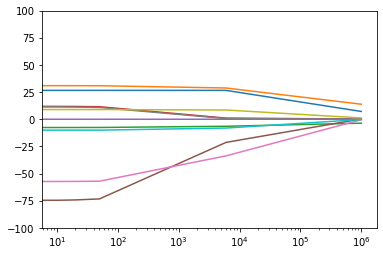

In [48]:
ax=plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale('log')
ax.set_ylim(-100,100)
plt.show()

In [49]:
errors=[]
coefs=[]
alphas=[-60, 0, 10, 20, 50, 6000, 1000000]
for alpha in alphas:
    linLasso = Lasso(alpha = alpha).fit(X_train, y_train)
    r2_train = linLasso.score(X_train, y_train)
    r2_test = linLasso.score(X_test, y_test)
    coefs.append(linLasso.coef_)
    errors.append(np.mean((linLasso.predict(X_test)-y_test)**2))
    print('Alpha = {:.2f}\n \
Lasso R2 training: {:.2f}, R2 test: {:.2f}\n'
         .format(alpha, r2_train, r2_test))

C:\Users\prave\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.635e+09, tolerance: 2.640e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\prave\AppData\Local\Temp\ipykernel_17136\3236782886.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  linLasso = Lasso(alpha = alpha).fit(X_train, y_train)
C:\Users\prave\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet

Alpha = -60.00
 Lasso R2 training: 0.37, R2 test: 0.40

Alpha = 0.00
 Lasso R2 training: 0.47, R2 test: 0.48

Alpha = 10.00
 Lasso R2 training: 0.47, R2 test: 0.48

Alpha = 20.00
 Lasso R2 training: 0.47, R2 test: 0.47

Alpha = 50.00
 Lasso R2 training: 0.46, R2 test: 0.47

Alpha = 6000.00
 Lasso R2 training: 0.04, R2 test: 0.03

Alpha = 1000000.00
 Lasso R2 training: 0.00, R2 test: -0.00



C:\Users\prave\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.002e+08, tolerance: 2.640e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [50]:
lasso=Lasso()
#parameters={'alpha':[-10000,-6000,-100,-200, 1, 10, 20, 50,100,150,200, 600, 1000000]}
parameters={'alpha':list(range(-300,300))}

gridSearchLasso=GridSearchCV(lasso,parameters,scoring='r2',cv=4)
gridSearchLasso.fit(X_train,y_train)



best_Lasso=gridSearchLasso.best_estimator_
bestLasso_testScore=best_Lasso.score(X_test,y_test)

C:\Users\prave\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.051e+09, tolerance: 2.012e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\prave\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.045e+09, tolerance: 1.995e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

In [51]:
print('The best R2 train score is : {:.2f} with Alpha = {:.2f}\n \
'.format(gridSearchLasso.best_score_,gridSearchLasso.best_params_['alpha']))
print('The best R2 test score is : {:.2f}\n with Alpha = {:.2f}\n \
'.format(bestLasso_testScore,gridSearchLasso.best_params_['alpha']))

The best R2 train score is : 0.47 with Alpha = 0.00
 
The best R2 test score is : 0.48
 with Alpha = 0.00
 


In [52]:
reporting['Lasso regression']=bestLasso_testScore

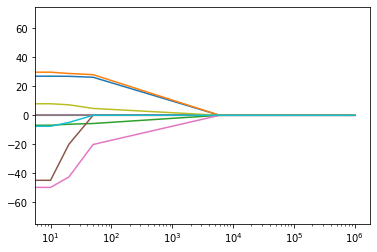

In [53]:
ax=plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale('log')
ax.set_ylim(-75,75)
plt.show()

In [54]:
C=[ 10,50,80,100, 500,600,800,1000,1400,1800,2200 ]
for i in C:
    svr_Model = SVR(C = i).fit(X_train, y_train)
    r2_train_svr = svr_Model.score(X_train, y_train)
    r2_test_svr=svr_Model.score(X_test, y_test)
    print('C = {:.2f}\n \
SVR R2 training: {:.2f}, R2 test: {:.2f}\n'
         .format(i, r2_train_svr, r2_test_svr))

C = 10.00
 SVR R2 training: -0.01, R2 test: -0.03

C = 50.00
 SVR R2 training: 0.02, R2 test: 0.00

C = 80.00
 SVR R2 training: 0.04, R2 test: 0.02

C = 100.00
 SVR R2 training: 0.05, R2 test: 0.03

C = 500.00
 SVR R2 training: 0.21, R2 test: 0.20

C = 600.00
 SVR R2 training: 0.24, R2 test: 0.23

C = 800.00
 SVR R2 training: 0.28, R2 test: 0.27

C = 1000.00
 SVR R2 training: 0.31, R2 test: 0.30

C = 1400.00
 SVR R2 training: 0.35, R2 test: 0.34

C = 1800.00
 SVR R2 training: 0.37, R2 test: 0.36

C = 2200.00
 SVR R2 training: 0.38, R2 test: 0.37



In [55]:
svr_Model=SVR()

param = {'C' : [800,1000,1400,1800,2200]}

gridSearchSVR=GridSearchCV(svr_Model,param,scoring='r2',cv=5)
gridSearchSVR.fit(X_train,y_train)


best_SVR=gridSearchSVR.best_estimator_
bestSVR_testScore=best_SVR.score(X_test,y_test)

In [56]:
print('The best R2 train score is : {:.2f} with C = {:.2f}\n \
'.format(gridSearchSVR.best_score_,gridSearchSVR.best_params_['C']))
print('The best R2 test score is : {:.2f}\n with Alpha = {:.2f}\n \
'.format(bestSVR_testScore,gridSearchSVR.best_params_['C']))

The best R2 train score is : 0.36 with C = 2200.00
 
The best R2 test score is : 0.37
 with Alpha = 2200.00
 


In [57]:
reporting['SVR']=gridSearchSVR.best_score_

In [58]:
scalerTrain = preprocessing.StandardScaler().fit(X_train)
scalerTest = preprocessing.StandardScaler().fit(X_test)
X_train_Scaled=scalerTrain.transform(X_train)
X_test_Scaled=scalerTest.transform(X_test)

In [59]:
decisionTree = DecisionTreeRegressor()

param = {'max_depth' : [1,4,5,6,7,10,15,20,8]}

gridSearch_decisionTree=GridSearchCV(decisionTree,param,scoring='r2',cv=6)
gridSearch_decisionTree.fit(X_train_Scaled,y_train)


best_DecisionTree=gridSearch_decisionTree.best_estimator_
bestDecisionTree_testScore=best_DecisionTree.score(X_test_Scaled,y_test)

In [60]:
print('The best Decision Tree R2 score is : {:.2f} with max depth = {:.2f} \n \
'.format(gridSearch_decisionTree.best_score_,gridSearch_decisionTree.best_params_['max_depth'] ))
print('The best R2 test score is : {:.2f}\n with max depth = {:.2f}\n \
'.format(bestDecisionTree_testScore,gridSearch_decisionTree.best_params_['max_depth']))

The best Decision Tree R2 score is : 0.74 with max depth = 8.00 
 
The best R2 test score is : 0.71
 with max depth = 8.00
 


In [61]:
reporting['Decision Tree Regressor']=bestDecisionTree_testScore

In [62]:
extraTreesAlgo = ExtraTreesRegressor()

param = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=170, num=10)], 
         'max_depth' : [50,60,70,80,90,100],
         'min_samples_split':[1,2,4,6,8],
         'min_samples_leaf':[1,2,3,4],
         'bootstrap' : [True,False]
        }

gridSearch_ExtraTrees=GridSearchCV(extraTreesAlgo,param,scoring='r2',cv=5)
gridSearch_ExtraTrees.fit(X_train_Scaled,y_train)

best_ExtrasTrees=gridSearch_ExtraTrees.best_estimator_
bestExtrasTrees_testScore=best_ExtrasTrees.score(X_test_Scaled,y_test)

C:\Users\prave\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2400 fits failed out of a total of 12000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\prave\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\prave\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\prave\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\prave\anaconda3\lib\site-pack

In [63]:
#best_randomForest.predict([[10,10,60,3,1000,0,0,2,12,1]])[0]

In [64]:
print('The best Random Forest R2 score is : {:.2f} with n estimators = {:.2f}, max depth : {:.2f}, min samples split : {} and min samples leaf : {}  \n \
'.format(gridSearch_ExtraTrees.best_score_,gridSearch_ExtraTrees.best_params_['n_estimators'],gridSearch_ExtraTrees.best_params_['max_depth'],gridSearch_ExtraTrees.best_params_['min_samples_split'],gridSearch_ExtraTrees.best_params_['min_samples_leaf'] ))
print('The best Random Forest R2 test score is : {:.2f} with n estimators = {:.2f}, max depth : {:.2f}, min samples split : {} and min samples leaf : {}  \n \
'.format(bestExtrasTrees_testScore,gridSearch_ExtraTrees.best_params_['n_estimators'],gridSearch_ExtraTrees.best_params_['max_depth'],gridSearch_ExtraTrees.best_params_['min_samples_split'],gridSearch_ExtraTrees.best_params_['min_samples_leaf'] ))

The best Random Forest R2 score is : 0.85 with n estimators = 116.00, max depth : 80.00, min samples split : 4 and min samples leaf : 1  
 
The best Random Forest R2 test score is : 0.85 with n estimators = 116.00, max depth : 80.00, min samples split : 4 and min samples leaf : 1  
 


In [65]:
reporting['Extra Trees Regressor']=bestExtrasTrees_testScore

In [66]:
df_results=pd.DataFrame()
df_results['model']=reporting.keys()
df_results['Score R2']=reporting.values()

In [67]:
df_results=df_results.set_index('model')

In [68]:
dfVizModels=pd.DataFrame(df_results['Score R2'].sort_values(ascending=False))
dfVizModels.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Score R2
model,
Extra Trees Regressor,0.848306
Decision Tree Regressor,0.712637
Linear regression,0.488850
Lasso regression,0.481033
Ridge regression,0.480975
SVR,0.364426


In [69]:
import pickle 

In [70]:
pickle.dump(best_ExtrasTrees, open("model.pkl",'wb'))

In [71]:
model=pickle.load(open("model.pkl",'rb'))

In [72]:
print(model.predict([[10,10,60,3,1000,0,0,2,12,1]])[0])

628.9942528735631
